# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [71]:
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import seaborn as sns
import pickle

from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



In [37]:
  
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv') 
print(df_raw)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [38]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
344,345,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S


In [40]:
df_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
df_raw.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Borramos las columnas que no vamos a precisar

In [43]:
df_transform=df_raw.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)

In [44]:
# dos variables nuevas
df_transform['Sex_encoded']=df_transform['Sex'].apply(lambda x: 1 if x=="female" else 0)

In [45]:
df_transform = df_transform.drop(['Sex'],axis=1)


In [46]:
df_transform['Embarked_S']=df_transform['Embarked'].apply(lambda x: 1 if x=="S" else 0)

In [47]:
df_transform['Embarked_C']=df_transform['Embarked'].apply(lambda x: 1 if x=="C" else 0)

In [48]:
df_transform['Age_clean']=df_transform['Age'].fillna(30)

In [49]:
df_transform=df_transform.drop(['Embarked'],axis=1)
df_transform=df_transform.drop(['Age'],axis=1)

In [50]:
df=df_transform.copy()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Sex_encoded  891 non-null    int64  
 6   Embarked_S   891 non-null    int64  
 7   Embarked_C   891 non-null    int64  
 8   Age_clean    891 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [52]:
X=df.drop(['Survived'],axis=1)

In [53]:
y=df['Survived']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=70)

In [55]:
X_train.describe()

,Pclass,SibSp,Parch,Fare,Sex_encoded,Embarked_S,Embarked_C,Age_clean
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.324850,0.482036,0.371257,31.951222,0.350299,0.705090,0.200599,29.921033
std,0.838099,1.014723,0.810286,51.201019,0.477421,0.456344,0.400748,13.030787
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,22.750000
50%,3.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,30.000000
75%,3.000000,1.000000,0.000000,30.178100,1.000000,1.000000,0.000000,35.000000
max,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,80.000000


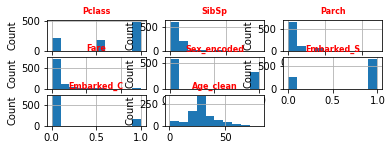

In [56]:
for index, i in enumerate(X):
    plt.subplot(6,3,index+1) 
    df1=df[i].hist()
    df1.plot(kind='bar')
    plt.title(f"{i}", fontsize=8, color= 'red', fontweight='bold')
    plt.ylabel('Count')
plt.Figure(figsize=(16,16))    
plt.show()

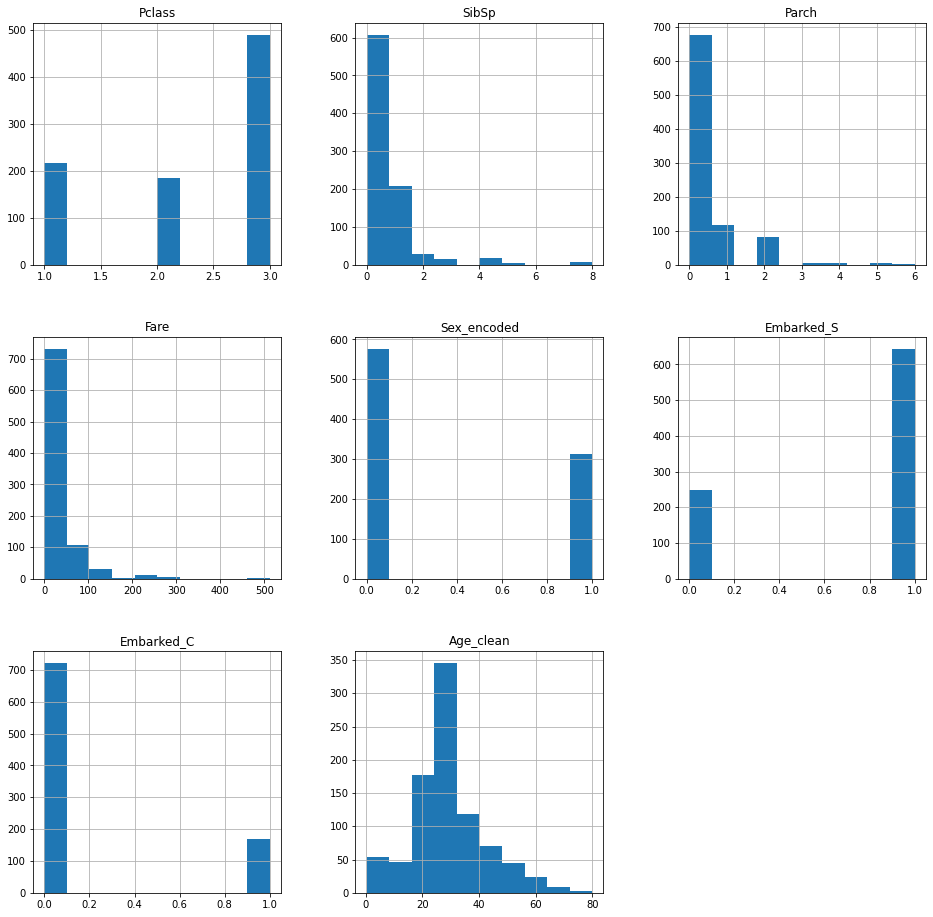

In [57]:
X.hist(figsize=(16,16))
plt.show()

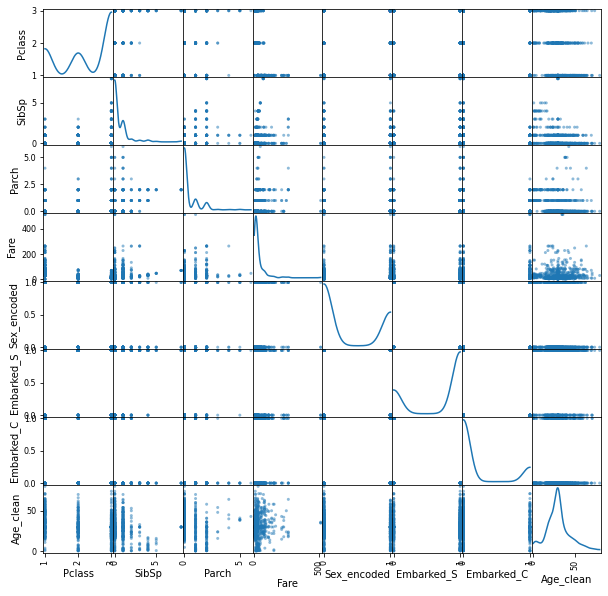

In [59]:
# scatter matrix

pd.plotting.scatter_matrix(X, diagonal='kde',figsize=(10,10))
plt.show()

In [60]:
# hacemos el calculo de la correlacion vemos que hay correlaciones
# En caso que sea mayor que 0.7 me quedo con una de las 2
# aca es -0.54

X.corr()

,Pclass,SibSp,Parch,Fare,Sex_encoded,Embarked_S,Embarked_C,Age_clean
Pclass,1.000000,0.083081,0.018443,-0.549500,-0.131900,0.081720,-0.243292,-0.329727
SibSp,0.083081,1.000000,0.414838,0.159651,0.114631,0.070941,-0.059528,-0.232440
Parch,0.018443,0.414838,1.000000,0.216225,0.245489,0.063036,-0.011069,-0.180330
Fare,-0.549500,0.159651,0.216225,1.000000,0.182333,-0.166603,0.269335,0.090632
Sex_encoded,-0.131900,0.114631,0.245489,0.182333,1.000000,-0.125722,0.082853,-0.084660
Embarked_S,0.081720,0.070941,0.063036,-0.166603,-0.125722,1.000000,-0.778359,-0.029322
Embarked_C,-0.243292,-0.059528,-0.011069,0.269335,0.082853,-0.778359,1.000000,0.032330
Age_clean,-0.329727,-0.232440,-0.180330,0.090632,-0.084660,-0.029322,0.032330,1.000000


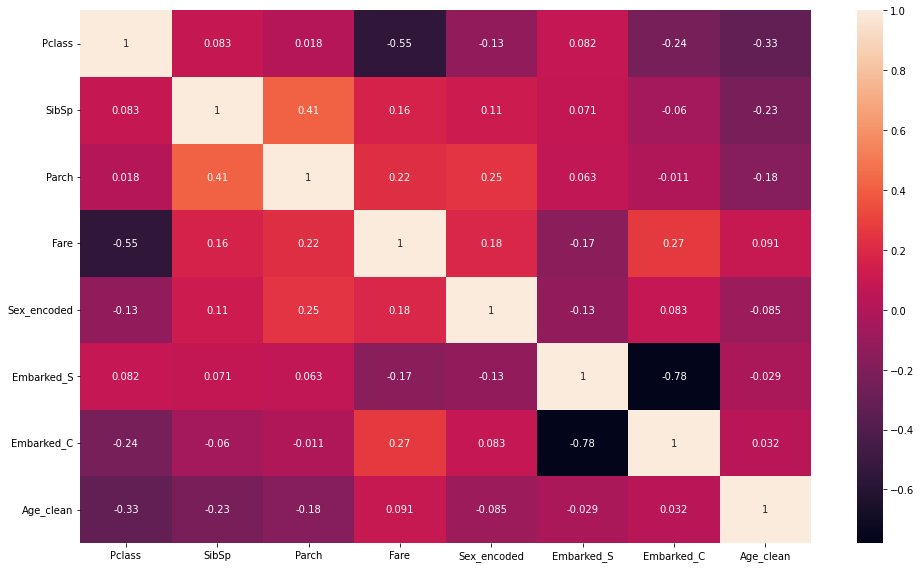

In [61]:
plt.figure(figsize=(14,8))
sns.heatmap(X.corr(), annot=True)
plt.tight_layout()

In [63]:
cl = RandomForestClassifier(random_state=1107)

In [64]:
# Problemas con las columas Age y AgeCleaned
cl.fit(X_train,y_train)


RandomForestClassifier(random_state=1107)

In [65]:
y_train_pred = cl.predict(X_train)
y_test_pred = cl.predict(X_test)

In [66]:
target_names = ['Muerto', 'Vivo']
print(classification_report(y_train, y_train_pred, target_names=target_names))

              precision    recall  f1-score   support

      Muerto       0.98      1.00      0.99       418
        Vivo       0.99      0.97      0.98       250

    accuracy                           0.99       668
   macro avg       0.99      0.98      0.98       668
weighted avg       0.99      0.99      0.98       668



In [67]:
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Muerto       0.80      0.89      0.84       131
        Vivo       0.82      0.67      0.74        92

    accuracy                           0.80       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



Con los valores obtenidos no es necesario hacer ajustes de los hiperparametros en este caso

In [68]:
pickle.dump(cl, open('../models/random_forest.pkl', 'wb'))

In [69]:
# Si queremos cargar el archivo guardado en la carpeta models

load_model = pickle.load(open('../models/random_forest.pkl', 'rb'))

In [70]:
load_model

RandomForestClassifier(random_state=1107)